# Physics 641 - Exam 1

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Problem 3.  Two Einstein solids in thermal contact

#### Consider two Einstein solids with $N_A=4$ and $E_A=10$ and $N_B=4$ and $E_B=2$.  The two sub-systems are thermally isolated from one another.  Verify that the number of microstates accessible to subsystem $A$ is 286 and the number of microstates accessible to subsystem $B$ is 10.  What is the initial number of accessible microstates for the composite system?

##### (a) The internal constraint is removed so that the two subsystems may exchange energy.  Determine the probability $P_A(E_A)$ that system $A$ has energy $E_A$.  Plot $P_A$ versus $E_A$ and discuss its qualitative energy dependence.

##### (b) What is the probability that energy is transferred from system $A$ to system $B$ and from system $B$ to system $A$?  What is the probabililty that energy goes from the hotter to the colder system?  How does this probability compare to the probability found from Table 4.3 for a smaller system?  Which system was hotter initially?

##### (c) What is the number of accessible microstates for the composite system after the internal constraint has been relaxed?  What is the change in the total entropy of the sytem (choose units such that $k=1$)?

##### (d) Determine the mean energy $\overline{E}_A$,  the most probable energy $\tilde{E}_A$, the standard deviations $\sigma_A$ and $\sigma_B$, and the relative fluctutations $\sigma_A/\overline{E}_A$.  How does the value of this ratio compare with the value of the ratio calculated in Table 4.3?

##### (e) The entropy of the composite system when each subsystem is in its most probable macrostate is $\ln\Omega_A(\tilde{E}_A)\Omega_B(E_{\text{tot}}-\tilde{E}_A)$.  Compare the value of this contribution to the value of the total entropy, $\sum_{E_A}=\ln\Omega_A(E_A)\Omega_B(E_{\text{tot}}-E_A)$, calculated in part (c)?

##### (f) *Consider successively larger systems and describe the qualitative behavior of the various quantities.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''Required Functions'''
from IPython.display import HTML, display

In [2]:
class EinsteinSolidSmall():
    
    '''Internal function to initialize the system'''
    def __init__(self, NA: int, EA: int, NB: int, EB: int):
        
        '''Einstein solids'''
        self.NA = int(NA)         #number of particles in Einstein solid A
        self.NB = int(NB)         #number of particles in Einstein solid B
        self.EA = int(EA)         #number of energy units in Einstein solid A
        self.EB = int(EB)         #number of energy units in Einstein solid B
        self.Etot = int(EA + EB)  #total number of energy units available
        self.SkbA_list = []       #list of pseudo-entropies of Einstein solid A
        self.SkbB_list = []       #list of pseudo-entropies of Einstein solid B
        self.ProbA_list = []      #list of probabilities Einstein solid A has energy units EA
        self.OmegaTot_list = []   #list of total available microstates for the composite system
        
        '''Dataframe'''
        self.df = pd.DataFrame(columns = ['EA', '\u03A9A(EA)', 'S(\u03A9A(EA))/kB', 'TA^-1', 'TA', 'EB', '\u03A9B(EB)',
                                          'S(\u03A9B(EB))/kB','TB^-1', 'TB', '\u03A9A(EA)*\u03A9B(EB)'])
        
        
    '''Internal function to calculate the factorial of a given number'''
    def factorial(self, N: int):
        
        '''Allow only positive integers'''
        if N < 0:
            raise ValueError('Cannot compute the factorial of a negative number!')

        '''0! = 1 // N! = N * (N-1) * (N-2) * ... * 1'''
        if N == 0:
            return 1
        else:
            return N * self.factorial(N - 1)
        
        
    '''Function called by the user to calculate the number of available microstates of an Einstein solid'''
    def microstates(self, N: int, E: int):
        Omega = self.factorial(E + N - 1) / (self.factorial(E) * self.factorial(N - 1))  #(E + N - 1)! / E!(N - 1)!
        return int(Omega)
    
    
    '''Internal function to calculate the temperature of the system from the slope of entropy vs energy'''
    def temperatures(self, EA: int, EB: int):
        
        '''Unable to calculate temperature // calculate from slope of entropy vs energy'''
        if EA == 0 or EB == 0:
            TA_inv = 'NaN'  #no slope at endpoints
            TB_inv = 'NaN'  #no slope at endpoints
            TA = 'NaN'      #no slope at endpoints
            TB = 'NaN'      #no slope at endpoints
        else:
            OmegaAi = self.microstates(self.NA, EA - 1)  #S(EA - deltaEA)
            OmegaBi = self.microstates(self.NB, EB - 1)  #S(EB - deltaEB)
            OmegaAf = self.microstates(self.NA, EA + 1)  #S(EA + deltaEA)
            OmegaBf = self.microstates(self.NB, EB + 1)  #S(EB + deltaEB)
            TA_inv = abs(np.log(OmegaAf) - np.log(OmegaAi)) / 2  #(S(EA + deltaEA) - S(EA - deltaEA)) / (2 * deltaEA)
            TB_inv = abs(np.log(OmegaBf) - np.log(OmegaBi)) / 2  #(S(EB + deltaEB) - S(EB - deltaEB)) / (2 * deltaEB)
            TA = 1 / TA_inv  #TA = 1 / TA^-1
            TB = 1 / TB_inv  #TB = 1 / TB^-1
        
        '''Return inverse temperature and temperature'''
        return TA_inv, TB_inv, TA, TB
            
            
    '''Function called by the user to create a table of relevant data for two Einstein solids exchanging energy'''
    def table(self):
        
        '''Loop through each possible arrangement of energy units'''
        for EA in range(self.Etot, -1, -1):
            
            '''Set EB'''
            EB = self.Etot - EA
            
            '''Calculate microstates'''
            OmegaA = self.microstates(self.NA, EA)  #microstates of A
            OmegaB = self.microstates(self.NB, EB)  #microstates of B
            OmegaTot = OmegaA * OmegaB              #total microstates
            self.OmegaTot_list.append(OmegaTot)
            
            '''Calculate pseudo-entropies'''
            SkbA = np.log(OmegaA)
            SkbB = np.log(OmegaB)
            self.SkbA_list.append(SkbA)
            self.SkbB_list.append(SkbB)
            
            '''Calculate temperatures'''
            TA_inv, TB_inv, TA, TB = self.temperatures(EA, EB)
            
            '''Create new row in dataframe'''
            row = [EA, OmegaA, SkbA, TA_inv, TA, EB, OmegaB, SkbB, TB_inv, TB, OmegaTot]
            self.df = pd.concat([self.df, pd.DataFrame([row], columns = self.df.columns)], ignore_index = True)
            
        '''Calculate probability; PA(EA) = OmegaA(EA) * OmegaB(EB) / OmegaTot'''
        self.ProbA_list = [OmegaTot / np.sum(self.OmegaTot_list) for OmegaTot in self.OmegaTot_list]
            
        '''Create new column in dataframe'''
        self.df['PA(EA)'] = self.ProbA_list
        
        '''Display table of dataframe'''
        display(self.df.style.hide(axis = 'index'))
        
        
    '''Function called by the user to plot the probability PA system A has energy units EA'''
    def plotPA(self, save_fig = True):
        
        '''Create figure and plot results'''
        fig, ax = plt.subplots(1, 1, figsize = (8, 5))
        fig.tight_layout(pad = 3)
        ax.set_xlabel('$E_A$')
        ax.set_ylabel('$P_A(E_A)$')
        ax.set_title(f'Energy Dependence of $P_A(E_A)$ for $N_A={self.NA},\ N_B={self.NB},\ Etot={self.Etot}$')
        ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax.plot([EA for EA in range(self.Etot, -1, -1)], self.ProbA_list, linestyle = 'solid', color = 'red')
        ax.scatter([EA for EA in range(self.Etot, -1, -1)], self.ProbA_list, s = 5, c = 'black', zorder = 5)
        
        '''Save figure'''
        if save_fig:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/PA(EA)_NA{self.NA}_NB{self.NB}_Etot{self.Etot}.png')
            
            
    '''Function called by the user to calculate the change in total entropy
       of the system after the internal constraint is removed.'''
    def entropyChange(self):
        
        '''Total entropy of system with internal constraint'''
        index = self.Etot - self.EA
        SkbI = self.SkbA_list[index] + self.SkbB_list[index]
        
        '''Total entropy of system with internal constraint removed'''
        SkbF = np.sum(self.SkbA_list + self.SkbB_list)
            
        '''Calculate change in total entropy'''
        changeSkb = SkbF - SkbI
        
        '''Print and return results'''
        print(f'The total entropy of the system with the internal constraint is Si/kB = {SkbI:.3f}.')
        print(f'The total entropy of the system with the internal constraint removed is Sf/kB = {SkbF:.3f}.')
        print(f'The change in the total entropy of the system is \u0394S/kB = +{changeSkb:.3f}.')
        return SkbI, SkbF
        
        
    '''Function called by the user to find the statistics for the distribution of the energy units between the systems'''
    def statistics(self):
        
        '''Calculate mean energy, most probable energy, standard deviation, and relative fluctuation for system A'''
        probEA = self.Etot - self.ProbA_list.index(max(self.ProbA_list))  #most likely macrostate
        meanEA, meanEA2 = 0, 0
        for EA, PA in zip(range(self.Etot, -1, -1), self.ProbA_list):
            meanEA += (EA * PA)               #<EA> = sum{EA_i * PA_i}
            meanEA2 += (EA**2 * PA)           #<EA^2> = sum{EA_i^2 * PA_i}
        meanEA = int(round(meanEA, 0))
        stdEA = np.sqrt(meanEA2 - meanEA**2)  #sigma = sqrt{<EA^2> - <EA>^2}
        fluctEA = stdEA / meanEA              #fluctuation = sigma / <EA>
        print('System A:')
        print(f'The mean energy is \u0112A = {meanEA}.')
        print(f'The most probable energy is \u1EBCA = {probEA}.')
        print(f'The standard deviation of the energy is \u03C3A = {stdEA:.2f}.')
        print(f'The relative fluctuation is \u03C3A/\u0112A = {fluctEA:.2f}.')
        print()
        
        '''Calculate mean energy, most probable energy, standard deviation, and relative fluctuation for system B'''
        probEB = self.ProbA_list.index(max(self.ProbA_list))  #most likely macrostate
        meanEB, meanEB2 = self.Etot - meanEA, 0             #<EB> = Etot - <EA>
        for EB, PA in zip(range(0, self.Etot + 1, 1), self.ProbA_list):
            meanEB2 += (EB**2 * PA)           #<EB^2> = sum{EB_i^2 * PA_i}
        stdEB = np.sqrt(meanEB2 - meanEB**2)  #sigma = sqrt{<EB^2> - <EB>^2}
        fluctEB = stdEB / meanEB              #fluctuation = sigma / <EB>
        print('System B:')
        print(f'The mean energy is \u0112B = {int(meanEB)}.')
        print(f'The most probable energy is \u1EBCB = {probEB}.')
        print(f'The standard deviation of the energy is \u03C3B = {stdEB:.2f}.')
        print(f'The relative fluctuation is \u03C3B/\u0112B = {fluctEB:.2f}.')
        
        '''Return results'''
        return meanEA, probEA, stdEA, fluctEA, meanEB, probEB, stdEB, fluctEB

##### Verify that the number of microstates accessible to subsystem $A$ is 286 and the number of microstates accessible to subsystem $B$ is 10.  What is the initial number of accessible microstates for the composite system?

In [3]:
'''Set the system'''
NA_ex, EA_ex, NB_ex, EB_ex = 4, 10, 4, 2
ex = EinsteinSolidSmall(NA_ex, EA_ex, NB_ex, EB_ex)

'''Create table of relevant data'''
ex.table()

'''Available Microstates for A'''
print(f'The number of available microstates for A is \u03A9A = {ex.microstates(4, 10)}.')

'''Available Microstates for B'''
print(f'The number of available microstates for B is \u03A9B = {ex.microstates(4, 2)}.')

EA,ΩA(EA),S(ΩA(EA))/kB,TA^-1,TA,EB,ΩB(EB),S(ΩB(EB))/kB,TB^-1,TB,ΩA(EA)*ΩB(EB),PA(EA)
12,455,6.120297,NaN,NaN,0,1,0.000000,NaN,NaN,455,0.009030
11,364,5.897154,0.232153,4.307508,1,4,1.386294,1.151293,0.868589,1456,0.028896
10,286,5.655992,0.251763,3.971987,2,10,2.302585,0.804719,1.242670,2860,0.056760
9,220,5.393628,0.275023,3.636057,3,20,2.995732,0.626381,1.596471,4400,0.087322
8,165,5.105945,0.303068,3.299591,4,35,3.555348,0.514810,1.942465,5775,0.114611
7,120,4.787492,0.337564,2.962398,5,56,4.025352,0.437734,2.284490,6720,0.133365
6,84,4.430817,0.381070,2.624190,6,84,4.430817,0.381070,2.624190,7056,0.140033
5,56,4.025352,0.437734,2.284490,7,120,4.787492,0.337564,2.962398,6720,0.133365
4,35,3.555348,0.514810,1.942465,8,165,5.105945,0.303068,3.299591,5775,0.114611
3,20,2.995732,0.626381,1.596471,9,220,5.393628,0.275023,3.636057,4400,0.087322


The number of available microstates for A is ΩA = 286.
The number of available microstates for B is ΩB = 10.


##### (a) The internal constraint is removed so that the two subsystems may exchange energy.  Determine the probability $P_A(E_A)$ that system $A$ has energy $E_A$.  Plot $P_A$ versus $E_A$ and discuss its qualitative energy dependence.

We see that the plot of PA vs EA peaks at EA = 6 and drops to near zero at EA = 12 and at EA = 0.
This demonstrates how the system will tend toward the macrostate with the highest probability,
which occurs when system A and system B have an equal number of energy units between them.

As the number of particles in both systems and the number of energy units available increases,
the plot of PA vs Ea will approach a Gaussian curve from the Central Limit Theorem.


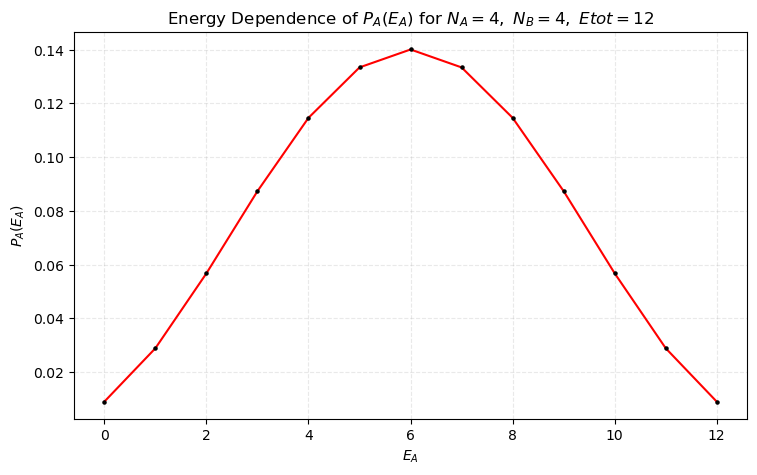

In [4]:
'''Create plot of PA(EA) vs EA'''
ex.plotPA()

'''Discuss results'''
print('We see that the plot of PA vs EA peaks at EA = 6 and drops to near zero at EA = 12 and at EA = 0.')
print('This demonstrates how the system will tend toward the macrostate with the highest probability,')
print('which occurs when system A and system B have an equal number of energy units between them.')
print()
print('As the number of particles in both systems and the number of energy units available increases,')
print('the plot of PA vs Ea will approach a Gaussian curve from the Central Limit Theorem.')

##### (b) What is the probability that energy is transferred from system $A$ to system $B$ and from system $B$ to system $A$?  What is the probabililty that energy goes from the hotter to the colder system?  How does this probability compare to the probability found from Table 4.3 for a smaller system?  Which system was hotter initially?

In [5]:
'''Find probability energy is transferred from A to B and from B to A'''
probAtoB_ex = np.sum(ex.ProbA_list[:ex.EA])      #sum of PA(EA) from EA = 9 to EA = 0
probBtoA_ex = np.sum(ex.ProbA_list[ex.EA + 1:])  #sum of PA(EA) from EA = 11 to EA = 12
probNone_ex = 1 - probAtoB_ex - probBtoA_ex      #initial probability
print(f'The probability that energy is transferred from system A to system B is P(A \u2192 B) = {probAtoB_ex:.3f}.')
print(f'The probability that energy is transferred from system B to system A is P(B \u2192 A) = {probBtoA_ex:.3f}.')
print(f'The probability that no energy is transferred is P(None) = {probNone_ex:.3f}.')
print()

'''Discuss results'''
print('We can conclude that system A is hotter initially, since the probability of system A transferring energy to')
print('system B (P=0.905) is much greater than that of the reverse (P=0.038).  From Table 4.3, the probability that')
print('the energy goes from the hotter system to the colder system is P=0.774.  Therefore, we see that a small increase')
print('in the number of particles and energy units leads to a large increase in the probability energy flows from hot')
print('to cold systems.  If we were to consider very large systems, we would find this probability to approach unity.')

The probability that energy is transferred from system A to system B is P(A → B) = 0.905.
The probability that energy is transferred from system B to system A is P(B → A) = 0.038.
The probability that no energy is transferred is P(None) = 0.057.

We can conclude that system A is hotter initially, since the probability of system A transferring energy to
system B (P=0.905) is much greater than that of the reverse (P=0.038).  From Table 4.3, the probability that
the energy goes from the hotter system to the colder system is P=0.774.  Therefore, we see that a small increase
in the number of particles and energy units leads to a large increase in the probability energy flows from hot
to cold systems.  If we were to consider very large systems, we would find this probability to approach unity.


##### (c) What is the number of accessible microstates for the composite system after the internal constraint has been relaxed?  What is the change in the total entropy of the sytem (choose units such that $k=1$)?

In [6]:
'''Find number of accessible microstates for the composite system after the internal constraint is relaxed'''
tot_ex = np.sum(ex.OmegaTot_list)
print(f'The number of microstates in the system after the internal constraint is removed is \u03A9Tot = {tot_ex}.')
print()

'''Find change in the total entropy of the system'''
SkbI_ex, SkbF_ex = ex.entropyChange()
print()

'''Discuss results'''
print('With the internal constraint in place, system A and system B cannot exchange energy, so the total entropy')
print('is simply the StotI = SA + SB = ln(\u03A9A) + ln(\u03A9B).  After the internal constraint is removed and the')
print('two systems are allowed to exchange energy, then the total entropy becomes StotF = \u03A3ln\u03A9(EA)\u03A9(EB).')
print('The total number of microstates has increased dramatically, so we would expect the total entropy to be much larger.')

The number of microstates in the system after the internal constraint is removed is ΩTot = 50388.

The total entropy of the system with the internal constraint is Si/kB = 7.959.
The total entropy of the system with the internal constraint removed is Sf/kB = 103.313.
The change in the total entropy of the system is ΔS/kB = +95.355.

With the internal constraint in place, system A and system B cannot exchange energy, so the total entropy
is simply the StotI = SA + SB = ln(ΩA) + ln(ΩB).  After the internal constraint is removed and the
two systems are allowed to exchange energy, then the total entropy becomes StotF = ΣlnΩ(EA)Ω(EB).
The total number of microstates has increased dramatically, so we would expect the total entropy to be much larger.


##### (d) Determine the mean energy $\overline{E}_A$,  the most probable energy $\tilde{E}_A$, the standard deviations $\sigma_A$ and $\sigma_B$, and the relative fluctutations $\sigma_A/\overline{E}_A$.  How does the value of this ratio compare with the value of the ratio calculated in Table 4.3?

In [7]:
'''Find mean energy, most probable energy, standard deviation, and relative fluctuation for the two systems'''
meanEA_ex, probEA_ex, stdEA_ex, fluctEA_ex, meanEB_ex, probEB_ex, stdEB_ex, fluctEB_ex = ex.statistics()
print()

'''Find mean energy, most probable energy, standard deviation, and relative fluctuation for Table 4.3'''
EAtable_list = [6, 5, 4, 3, 2, 1, 0]
PAtable_list = [7 / 84, 12 / 84, 15 / 84, 16 / 84, 15 / 84, 12 / 84, 7 / 84]
mean43, mean432 = 0, 0
for EA, PA in zip(EAtable_list, PAtable_list):
    mean43 += (EA * PA)
    mean432 += (EA**2 * PA)
std43 = np.sqrt(mean432 - mean43**2)
prob43 = EAtable_list[PAtable_list.index(max(PAtable_list))]
fluct43 = std43 / mean43
print('Table 4.3 - System A:')
print(f'The mean energy is \u0112A = {int(mean43)}.')
print(f'The most probable energy is \u1EBCA = {prob43}.')
print(f'The standard deviation of the energy is \u03C3A = {std43:.2f}.')
print(f'The relative fluctuation is \u03C3A/\u0112A = {fluct43:.2f}.')
print()

'''Discuss results'''
print('We see that the mean energy and most probable energy for both system A and system B are equal,')
print('such that \u0112A = \u1EBCA = \u0112B = \u1EBCB = 6.  Since the systems have an equal number of particles,')
print('this is the result we would expect.  Furthermore, the relative fluctuation of the systems are equal,')
print('such that \u03C3A/\u0112A = \u03C3B/\u0112B = 0.43.  However, these fluctuations are smaller than that calculated')
print('in Table 4.3, where \u03C3A/\u0112A = 0.58.  Since we have increased the number of particles and energy units,')
print('the distribution of the multiplicities is narrower for the larger system.')

System A:
The mean energy is ĒA = 6.
The most probable energy is ẼA = 6.
The standard deviation of the energy is σA = 2.58.
The relative fluctuation is σA/ĒA = 0.43.

System B:
The mean energy is ĒB = 6.
The most probable energy is ẼB = 6.
The standard deviation of the energy is σB = 2.58.
The relative fluctuation is σB/ĒB = 0.43.

Table 4.3 - System A:
The mean energy is ĒA = 3.
The most probable energy is ẼA = 3.
The standard deviation of the energy is σA = 1.73.
The relative fluctuation is σA/ĒA = 0.58.

We see that the mean energy and most probable energy for both system A and system B are equal,
such that ĒA = ẼA = ĒB = ẼB = 6.  Since the systems have an equal number of particles,
this is the result we would expect.  Furthermore, the relative fluctuation of the systems are equal,
such that σA/ĒA = σB/ĒB = 0.43.  However, these fluctuations are smaller than that calculated
in Table 4.3, where σA/ĒA = 0.58.  Since we have increased the number of particles and energy units,
the distr

##### (e) The entropy of the composite system when each subsystem is in its most probable macrostate is $\ln\Omega_A(\tilde{E}_A)\Omega_B(E_{\text{tot}}-\tilde{E}_A)$.  Compare the value of this contribution to the value of the total entropy, $\sum_{E_A}=\ln\Omega_A(E_A)\Omega_B(E_{\text{tot}}-E_A)$, calculated in part (c)?

In [8]:
'''Find entropy for most probable macrostate'''
SkbP_ex = np.log(ex.microstates(ex.NA, probEA_ex) * ex.microstates(ex.NB, ex.Etot - probEA_ex))
frac_ex = SkbP_ex / SkbF_ex  #most probable macrostate entropy as fraction of total entropy

'''Print results'''
print(f'The entropy of the most probable macrostate is Sp/kB = {SkbP_ex:.3f}.')
print(f'The total entropy of the system is Stot/kB = {SkbF_ex:.3f}.')
print(f'The fraction of the total entropy is (Sp/kB)/(Sf/kB) = {frac_ex:.3f}.')
print()

'''Discuss results'''
print('The entropy of the most probable macrostate makes up approximately 9% of the total entropy of the')
print('system, and this is the largest contribution to the total entropy of system.  Since this is the')
print('equilibrium macrostate, it follows that the entropy of this macrostate should be a maximum.')

The entropy of the most probable macrostate is Sp/kB = 8.862.
The total entropy of the system is Stot/kB = 103.313.
The fraction of the total entropy is (Sp/kB)/(Sf/kB) = 0.086.

The entropy of the most probable macrostate makes up approximately 9% of the total entropy of the
system, and this is the largest contribution to the total entropy of system.  Since this is the
equilibrium macrostate, it follows that the entropy of this macrostate should be a maximum.


##### (f) *Consider successively larger systems and describe the qualitative behavior of the various quantities.

##### New class to calculate the relevant data with Stirling approximation's for large numbers.

In [9]:
class EinsteinSolidLarge():
    
    '''Internal function to initialize the system'''
    def __init__(self, NA: int, EA: int, NB: int, EB: int):
        
        '''Einstein solids'''
        self.NA = int(NA)         #number of particles in Einstein solid A
        self.NB = int(NB)         #number of particles in Einstein solid B
        self.EA = int(EA)         #number of energy units in Einstein solid A
        self.EB = int(EB)         #number of energy units in Einstein solid B
        self.Etot = int(EA + EB)  #total number of energy units available
        self.SkbA_list = []       #list of pseudo-entropies of Einstein solid A
        self.SkbB_list = []       #list of pseudo-entropies of Einstein solid B
        self.ProbA_list = []      #list of probabilities Einstein solid A has energy units EA
        self.OmegaTot_list = []   #list of total available microstates for the composite system
        
        '''Dataframe'''
        self.df = pd.DataFrame(columns = ['EA', '\u03A9A(EA)', 'S(\u03A9A(EA))/kB', 'TA^-1', 'TA', 'EB', '\u03A9B(EB)',
                                          'S(\u03A9B(EB))/kB','TB^-1', 'TB', '\u03A9A(EA)*\u03A9B(EB)'])
        
        
    '''Internal function to calculate the factorial of a given number using the Stirling approximation'''
    def factorial(self, N: int):
        
        '''Allow only positive integers'''
        if N < 0:
            raise ValueError('Cannot compute the factorial of a negative number!')

        '''0! = 1 // N! = N * (N-1) * (N-2) * ... * 1'''
        if N == 0:
            return 1
        else:
            fact = (N / np.exp(1))**N  #Stirling approximation
            return fact
        
        
    '''Internal function to calculate the logarithm of a given value using the Stirling approximation'''
    def log(self, N: int, E: int):
        
        '''E = 0 --> Entropy = 0 // Stirling approximation'''
        if E == 0:
            return 0
        else:
            approx = (E + N) * np.log(E + N) - E * np.log(E) - N * np.log(N)  #Stirling approximation
            return approx
        
        
    '''Function called by the user to calculate the number of available microstates of an Einstein solid'''
    def microstates(self, N: int, E: int):
        Omega = (N / (E + N)) * (self.factorial(E + N) / (self.factorial(E) * self.factorial(N)))  #Stirling approximation
        return Omega
    
    
    '''Internal function to calculate the temperature of the system from the slope of entropy vs energy'''
    def temperatures(self, EA: int, EB: int):
        
        '''Unable to calculate temperature // calculate from slope of entropy vs energy'''
        if EA == 0 or EB == 0:
            TA_inv = 'NaN'  #no slope at endpoints
            TB_inv = 'NaN'  #no slope at endpoints
            TA = 'NaN'      #no slope at endpoints
            TB = 'NaN'      #no slope at endpoints
        else:
            TA_inv = abs(self.log(self.NA, EA + 1) - self.log(self.NA, EA - 1)) / 2  
            TB_inv = abs(self.log(self.NB, EB + 1) - self.log(self.NB, EB - 1)) / 2
            TA = 1 / TA_inv  #TA = 1 / TA^-1
            TB = 1 / TB_inv  #TB = 1 / TB^-1
        
        '''Return inverse temperature and temperature'''
        return TA_inv, TB_inv, TA, TB
            
            
    '''Function called by the user to create a table of relevant data for two Einstein solids exchanging energy'''
    def table(self):
        
        '''Loop through each possible arrangement of energy units'''
        for EA in range(self.Etot, -1, -1):
            
            '''Set EB'''
            EB = self.Etot - EA
            
            '''Calculate microstates'''
            OmegaA = self.microstates(self.NA, EA)  #microstates of A
            OmegaB = self.microstates(self.NB, EB)  #microstates of B
            OmegaTot = OmegaA * OmegaB              #total microstates
            self.OmegaTot_list.append(OmegaTot)
            
            '''Calculate pseudo-entropies'''
            SkbA = self.log(self.NA, EA)
            SkbB = self.log(self.NB, EB)
            self.SkbA_list.append(SkbA)
            self.SkbB_list.append(SkbB)
            
            '''Calculate temperatures'''
            TA_inv, TB_inv, TA, TB = self.temperatures(EA, EB)
            
            '''Create new row in dataframe'''
            row = [EA, f'{OmegaA:.3E}', SkbA, TA_inv, TA, EB, f'{OmegaB:.3E}', SkbB, TB_inv, TB, f'{OmegaTot:.3E}']
            self.df = pd.concat([self.df, pd.DataFrame([row], columns = self.df.columns)], ignore_index = True)
            
        '''Calculate probability; PA(EA) = OmegaA(EA) * OmegaB(EB) / OmegaTot'''
        self.ProbA_list = [OmegaTot / np.sum(self.OmegaTot_list) for OmegaTot in self.OmegaTot_list]
            
        '''Create new column in dataframe'''
        self.df['PA(EA)'] = [f'{ProbA:.3E}' for ProbA in self.ProbA_list]
        
        '''Style dataframe'''
        df_display = pd.concat([self.df.head(), self.df.iloc[self.Etot // 2 - 2: self.Etot // 2 + 3], self.df.tail()])
        
        '''Display table of dataframe'''
        display(df_display.style.hide(axis = 'index'))
        
        
    '''Function called by the user to plot the probability PA system A has energy units EA'''
    def plotPA(self, save_fig = True):
        
        '''Create figure and plot results'''
        fig, ax = plt.subplots(1, 1, figsize = (8, 5))
        fig.tight_layout(pad = 3)
        ax.set_xlabel('$E_A$')
        ax.set_ylabel('$P_A(E_A)$')
        ax.set_title(f'Energy Dependence of $P_A(E_A)$ for $N_A={self.NA},\ N_B={self.NB},\ Etot={self.Etot}$')
        ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax.plot([EA for EA in range(self.Etot, -1, -1)], self.ProbA_list, linestyle = 'solid', color = 'red')
        ax.scatter([EA for EA in range(self.Etot, -1, -1)], self.ProbA_list, s = 5, c = 'black', zorder = 5)
        
        '''Save figure'''
        if save_fig:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/PA(EA)_NA{self.NA}_NB{self.NB}_Etot{self.Etot}.png')
            
            
    '''Function called by the user to calculate the change in total entropy
       of the system after the internal constraint is removed.'''
    def entropyChange(self):
        
        '''Total entropy of system with internal constraint'''
        index = self.Etot - self.EA
        SkbI = self.SkbA_list[index] + self.SkbB_list[index]
        
        '''Total entropy of system with internal constraint removed'''
        SkbF = np.sum(self.SkbA_list + self.SkbB_list)
            
        '''Calculate change in total entropy'''
        changeSkb = SkbF - SkbI
        
        '''Print and return results'''
        print(f'The total entropy of the system with the internal constraint is Si/kB = {SkbI:.3f}.')
        print(f'The total entropy of the system with the internal constraint removed is Sf/kB = {SkbF:.3f}.')
        print(f'The change in the total entropy of the system is \u0394S/kB = +{changeSkb:.3f}.')
        return SkbI, SkbF
    
    
    '''Function called by the user to find the statistics for the distribution of the energy units between the systems'''
    def statistics(self):
        
        '''Calculate mean energy, most probable energy, standard deviation, and relative fluctuation for system A'''
        probEA = self.Etot - self.ProbA_list.index(max(self.ProbA_list))  #most likely macrostate
        meanEA, meanEA2 = 0, 0
        for EA, PA in zip(range(self.Etot, -1, -1), self.ProbA_list):
            meanEA += (EA * PA)               #<EA> = sum{EA_i * PA_i}
            meanEA2 += (EA**2 * PA)           #<EA^2> = sum{EA_i^2 * PA_i}
        meanEA = int(round(meanEA, 0))
        stdEA = np.sqrt(meanEA2 - meanEA**2)  #sigma = sqrt{<EA^2> - <EA>^2}
        fluctEA = stdEA / meanEA              #fluctuation = sigma / <EA>
        print('System A:')
        print(f'The mean energy is \u0112A = {meanEA}.')
        print(f'The most probable energy is \u1EBCA = {probEA}.')
        print(f'The standard deviation of the energy is \u03C3A = {stdEA:.2f}.')
        print(f'The relative fluctuation is \u03C3A/\u0112A = {fluctEA:.2f}.')
        print()
        
        '''Calculate mean energy, most probable energy, standard deviation, and relative fluctuation for system B'''
        probEB = self.ProbA_list.index(max(self.ProbA_list))  #most likely macrostate
        meanEB, meanEB2 = self.Etot - meanEA, 0               #<EB> = Etot - <EA>
        for EB, PA in zip(range(0, self.Etot + 1, 1), self.ProbA_list):
            meanEB2 += (EB**2 * PA)           #<EB^2> = sum{EB_i^2 * PA_i}
        stdEB = np.sqrt(meanEB2 - meanEB**2)  #sigma = sqrt{<EB^2> - <EB>^2}
        fluctEB = stdEB / meanEB              #fluctuation = sigma / <EB>
        print('System B:')
        print(f'The mean energy is \u0112B = {int(meanEB)}.')
        print(f'The most probable energy is \u1EBCB = {probEB}.')
        print(f'The standard deviation of the energy is \u03C3B = {stdEB:.2f}.')
        print(f'The relative fluctuation is \u03C3B/\u0112B = {fluctEB:.2f}.')
        
        '''Return results'''
        return meanEA, probEA, stdEA, fluctEA, meanEB, probEB, stdEB, fluctEB

##### Low Temperature Limit: $N>>E$.

EA,ΩA(EA),S(ΩA(EA))/kB,TA^-1,TA,EB,ΩB(EB),S(ΩB(EB))/kB,TB^-1,TB,ΩA(EA)*ΩB(EB),PA(EA)
20,2.523E+23,54.067345,NaN,NaN,0,1.000E+00,0,NaN,NaN,2.523E+23,4.127E-07
19,4.152E+22,52.254336,1.835135,0.544919,1,2.705E+02,5.610154,4.921957,0.203171,1.123E+25,1.837E-05
18,6.536E+21,50.397075,1.880816,0.531684,2,1.847E+04,9.843914,3.977038,0.251443,1.207E+26,1.975E-04
17,9.816E+20,48.492705,1.929526,0.518262,3,7.551E+05,13.564230,3.555272,0.281272,7.412E+26,1.212E-03
16,1.402E+20,46.538024,1.981641,0.504632,4,2.219E+07,16.954457,3.268699,0.305932,3.111E+27,5.089E-03
12,3.259E+16,38.135975,2.234739,0.447480,8,2.247E+12,28.517622,2.605292,0.383834,7.322E+28,1.198E-01
11,3.390E+15,35.863986,2.313002,0.432339,9,2.844E+13,31.064879,2.496175,0.400613,9.640E+28,1.577E-01
10,3.249E+14,33.509971,2.399553,0.416744,10,3.249E+14,33.509971,2.399553,0.416744,1.056E+29,1.727E-01
9,2.844E+13,31.064879,2.496175,0.400613,11,3.390E+15,35.863986,2.313002,0.432339,9.640E+28,1.577E-01
8,2.247E+12,28.517622,2.605292,0.383834,12,3.259E+16,38.135975,2.234739,0.447480,7.322E+28,1.198E-01


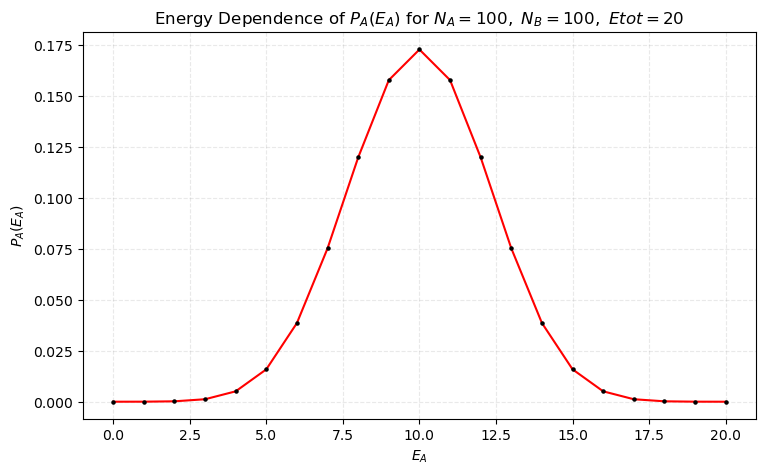

In [10]:
'''Set the system'''
NA_lowT, EA_lowT, NB_lowT, EB_lowT = 100, 15, 100, 5
lowT = EinsteinSolidLarge(NA_lowT, EA_lowT, NB_lowT, EB_lowT)

'''Create table of relevant data'''
lowT.table()

'''Create plot of PA(EA) vs EA'''
lowT.plotPA()

In [11]:
'''Find probability energy is transferred from A to B and from B to A'''
probAtoB_lowT = np.sum(lowT.ProbA_list[:lowT.EA])      #sum of PA(EA) from EA = 9 to EA = 0
probBtoA_lowT = np.sum(lowT.ProbA_list[lowT.EA + 1:])  #sum of PA(EA) from EA = 11 to EA = 12
probNone_lowT = 1 - probAtoB_lowT - probBtoA_lowT      #initial probability
print(f'The probability that energy is transferred from system A to system B is P(A \u2192 B) = {probAtoB_lowT:.3f}.')
print(f'The probability that energy is transferred from system B to system A is P(B \u2192 A) = {probBtoA_lowT:.3f}.')
print(f'The probability that no energy is transferred is P(None) = {probNone_lowT:.3f}.')
print()

'''Find number of accessible microstates for the composite system after the internal constraint is relaxed'''
tot_lowT = np.sum(lowT.OmegaTot_list)
print(f'The number of microstates in the system after the internal constraint is removed is \u03A9Tot = {tot_lowT:.3E}.')
print()

'''Find change in the total entropy of the system'''
SkbI_lowT, SkbF_lowT = lowT.entropyChange()
print()

'''Find mean energy, most probable energy, standard deviation, and relative fluctuation for the two systems'''
meanEA_lowT, probEA_lowT, stdEA_lowT, fluctEA_lowT, meanEB_lowT, probEB_lowT, stdEB_lowT, fluctEB_lowT = lowT.statistics()
print()

'''Find entropy for most probable macrostate'''
SkbP_lowT = np.log(lowT.microstates(lowT.NA, probEA_lowT) * lowT.microstates(lowT.NB, lowT.Etot - probEA_lowT))
frac_lowT = SkbP_lowT / SkbF_lowT  #most probable macrostate entropy as fraction of total entropy
print(f'The entropy of the most probable macrostate is Sp/kB = {SkbP_lowT:.3f}.')
print(f'The total entropy of the system is Stot/kB = {SkbF_lowT:.3f}.')
print(f'The fraction of the total entropy is (Sp/kB)/(Sf/kB) = {frac_lowT:.3f}.')
print()

The probability that energy is transferred from system A to system B is P(A → B) = 0.978.
The probability that energy is transferred from system B to system A is P(B → A) = 0.007.
The probability that no energy is transferred is P(None) = 0.016.

The number of microstates in the system after the internal constraint is removed is ΩTot = 6.113E+29.

The total entropy of the system with the internal constraint is Si/kB = 64.631.
The total entropy of the system with the internal constraint removed is Sf/kB = 1322.307.
The change in the total entropy of the system is ΔS/kB = +1257.675.

System A:
The mean energy is ĒA = 10.
The most probable energy is ẼA = 10.
The standard deviation of the energy is σA = 2.27.
The relative fluctuation is σA/ĒA = 0.23.

System B:
The mean energy is ĒB = 10.
The most probable energy is ẼB = 10.
The standard deviation of the energy is σB = 2.27.
The relative fluctuation is σB/ĒB = 0.23.

The entropy of the most probable macrostate is Sp/kB = 66.829.
The total 

##### High Temperature Limit: $E>>N$.

EA,ΩA(EA),S(ΩA(EA))/kB,TA^-1,TA,EB,ΩB(EB),S(ΩB(EB))/kB,TB^-1,TB,ΩA(EA)*ΩB(EB),PA(EA)
150,1.100E+15,37.406665,NaN,NaN,0,1.000E+00,0,NaN,NaN,1.100E+15,3.198E-12
149,1.038E+15,37.341918,0.064959,15.394370,1,2.594E+01,3.350997,2.703367,0.369909,2.691E+16,7.823E-11
148,9.782E+14,37.276748,0.065384,15.294334,2,1.858E+02,5.406735,1.835828,0.544713,1.817E+17,5.282E-10
147,9.219E+14,37.211150,0.065814,15.194296,3,8.629E+02,7.022654,1.484520,0.673618,7.955E+17,2.313E-09
146,8.686E+14,37.145119,0.066250,15.094259,4,3.100E+03,8.375774,1.262529,0.792061,2.693E+18,7.829E-09
77,3.458E+12,31.035138,0.122109,8.189419,73,2.197E+12,30.534380,0.128388,7.788875,7.598E+24,2.209E-02
76,3.094E+12,30.912283,0.123620,8.089288,74,2.466E+12,30.661943,0.126759,7.889016,7.631E+24,2.218E-02
75,2.764E+12,30.787897,0.125170,7.989154,75,2.764E+12,30.787897,0.125170,7.989154,7.642E+24,2.222E-02
74,2.466E+12,30.661943,0.126759,7.889016,76,3.094E+12,30.912283,0.123620,8.089288,7.631E+24,2.218E-02
73,2.197E+12,30.534380,0.128388,7.788875,77,3.458E+12,31.035138,0.122109,8.189419,7.598E+24,2.209E-02


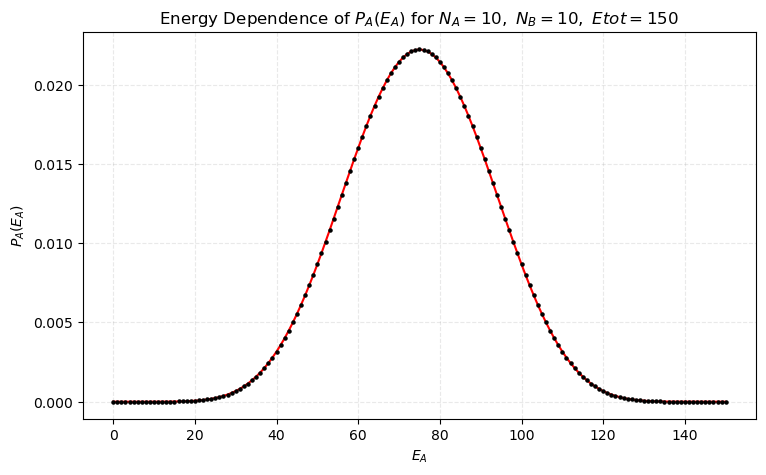

In [12]:
'''Set the system'''
NA_highT, EA_highT, NB_highT, EB_highT = 10, 100, 10, 50
highT = EinsteinSolidLarge(NA_highT, EA_highT, NB_highT, EB_highT)

'''Create table of relevant data'''
highT.table()

'''Create plot of PA(EA) vs EA'''
highT.plotPA()

In [13]:
'''Find probability energy is transferred from A to B and from B to A'''
probAtoB_highT = np.sum(highT.ProbA_list[:highT.EA])      #sum of PA(EA) from EA = 9 to EA = 0
probBtoA_highT = np.sum(highT.ProbA_list[highT.EA + 1:])  #sum of PA(EA) from EA = 11 to EA = 12
probNone_highT = 1 - probAtoB_highT - probBtoA_highT      #initial probability
print(f'The probability that energy is transferred from system A to system B is P(A \u2192 B) = {probAtoB_highT:.3f}.')
print(f'The probability that energy is transferred from system B to system A is P(B \u2192 A) = {probBtoA_highT:.3f}.')
print(f'The probability that no energy is transferred is P(None) = {probNone_highT:.3f}.')
print()

'''Find number of accessible microstates for the composite system after the internal constraint is relaxed'''
tot_highT = np.sum(highT.OmegaTot_list)
print(f'The number of microstates in the system after the internal constraint is removed is \u03A9Tot = {tot_highT:.3E}.')
print()

'''Find change in the total entropy of the system'''
SkbI_highT, SkbF_highT = highT.entropyChange()
print()

'''Find mean energy, most probable energy, standard deviation, and relative fluctuation for the two systems'''
meanEA_highT, probEA_highT, stdEA_highT, fluctEA_highT, meanEB_highT, probEB_highT, stdEB_highT, fluctEB_highT = highT.statistics()
print()

'''Find entropy for most probable macrostate'''
SkbP_highT = np.log(highT.microstates(highT.NA, probEA_highT) * highT.microstates(highT.NB, highT.Etot - probEA_highT))
frac_highT = SkbP_highT / SkbF_highT  #most probable macrostate entropy as fraction of total entropy
print(f'The entropy of the most probable macrostate is Sp/kB = {SkbP_highT:.3f}.')
print(f'The total entropy of the system is Stot/kB = {SkbF_highT:.3f}.')
print(f'The fraction of the total entropy is (Sp/kB)/(Sf/kB) = {frac_highT:.3f}.')
print()

The probability that energy is transferred from system A to system B is P(A → B) = 0.919.
The probability that energy is transferred from system B to system A is P(B → A) = 0.072.
The probability that no energy is transferred is P(None) = 0.009.

The number of microstates in the system after the internal constraint is removed is ΩTot = 3.440E+26.

The total entropy of the system with the internal constraint is Si/kB = 60.544.
The total entropy of the system with the internal constraint removed is Sf/kB = 8583.678.
The change in the total entropy of the system is ΔS/kB = +8523.134.

System A:
The mean energy is ĒA = 75.
The most probable energy is ẼA = 75.
The standard deviation of the energy is σA = 17.30.
The relative fluctuation is σA/ĒA = 0.23.

System B:
The mean energy is ĒB = 75.
The most probable energy is ẼB = 75.
The standard deviation of the energy is σB = 17.30.
The relative fluctuation is σB/ĒB = 0.23.

The entropy of the most probable macrostate is Sp/kB = 57.296.
The tota

##### Large System: $N\approx E$.

EA,ΩA(EA),S(ΩA(EA))/kB,TA^-1,TA,EB,ΩB(EB),S(ΩB(EB))/kB,TB^-1,TB,ΩA(EA)*ΩB(EB),PA(EA)
120,1.565E+44,102.985575,NaN,NaN,0,1.000E+00,0,NaN,NaN,1.565E+44,5.504E-23
119,1.110E+44,102.636037,0.350781,2.850780,1,1.346E+02,4.921957,4.238614,0.235926,1.494E+46,5.253E-21
118,7.853E+43,102.284013,0.353285,2.830573,2,4.619E+03,8.477229,3.303264,0.302731,3.628E+47,1.276E-19
117,5.542E+43,101.929466,0.355826,2.810362,3,9.582E+04,11.528484,2.890791,0.345926,5.310E+48,1.867E-18
116,3.901E+43,101.572360,0.358404,2.790148,4,1.442E+06,14.258811,2.613251,0.382665,5.627E+49,1.979E-17
62,1.217E+33,76.988391,0.591395,1.690918,58,1.117E+32,74.563328,0.621723,1.608432,1.359E+65,4.780E-02
61,6.775E+32,76.393396,0.598688,1.670320,59,2.052E+32,75.181060,0.613844,1.629078,1.390E+65,4.889E-02
60,3.743E+32,75.791016,0.606168,1.649707,60,3.743E+32,75.791016,0.606168,1.649707,1.401E+65,4.926E-02
59,2.052E+32,75.181060,0.613844,1.629078,61,6.775E+32,76.393396,0.598688,1.670320,1.390E+65,4.889E-02
58,1.117E+32,74.563328,0.621723,1.608432,62,1.217E+33,76.988391,0.591395,1.690918,1.359E+65,4.780E-02


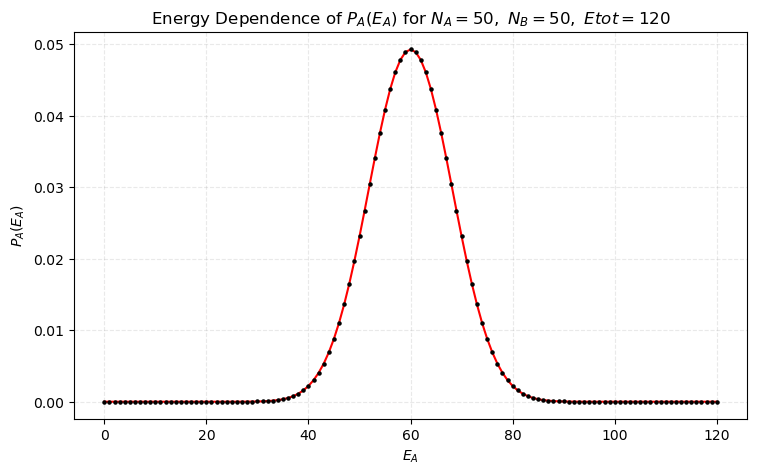

In [14]:
'''Set the system'''
NA_large, EA_large, NB_large, EB_large = 50, 80, 50, 40
large = EinsteinSolidLarge(NA_large, EA_large, NB_large, EB_large)

'''Create table of relevant data'''
large.table()

'''Create plot of PA(EA) vs EA'''
large.plotPA()

In [15]:
'''Find probability energy is transferred from A to B and from B to A'''
probAtoB_large = np.sum(large.ProbA_list[:large.EA])      #sum of PA(EA) from EA = 9 to EA = 0
probBtoA_large = np.sum(large.ProbA_list[large.EA + 1:])  #sum of PA(EA) from EA = 11 to EA = 12
probNone_large = 1 - probAtoB_large - probBtoA_large      #initial probability
print(f'The probability that energy is transferred from system A to system B is P(A \u2192 B) = {probAtoB_large:.3f}.')
print(f'The probability that energy is transferred from system B to system A is P(B \u2192 A) = {probBtoA_large:.3f}.')
print(f'The probability that no energy is transferred is P(None) = {probNone_large:.3f}.')
print()

'''Find number of accessible microstates for the composite system after the internal constraint is relaxed'''
tot_large = np.sum(large.OmegaTot_list)
print(f'The number of microstates in the system after the internal constraint is removed is \u03A9Tot = {tot_large:.3E}.')
print()

'''Find change in the total entropy of the system'''
SkbI_large, SkbF_large = large.entropyChange()
print()

'''Find mean energy, most probable energy, standard deviation, and relative fluctuation for the two systems'''
meanEA_large, probEA_large, stdEA_large, fluctEA_large, meanEB_large, probEB_large, stdEB_large, fluctEB_large = large.statistics()
print()

'''Find entropy for most probable macrostate'''
SkbP_large = np.log(large.microstates(large.NA, probEA_large) * large.microstates(large.NB, large.Etot - probEA_large))
frac_large = SkbP_large / SkbF_large  #most probable macrostate entropy as fraction of total entropy
print(f'The entropy of the most probable macrostate is Sp/kB = {SkbP_large:.3f}.')
print(f'The total entropy of the system is Stot/kB = {SkbF_large:.3f}.')
print(f'The fraction of the total entropy is (Sp/kB)/(Sf/kB) = {frac_large:.3f}.')
print()

The probability that energy is transferred from system A to system B is P(A → B) = 0.993.
The probability that energy is transferred from system B to system A is P(B → A) = 0.005.
The probability that no energy is transferred is P(None) = 0.002.

The number of microstates in the system after the internal constraint is removed is ΩTot = 2.844E+66.

The total entropy of the system with the internal constraint is Si/kB = 148.443.
The total entropy of the system with the internal constraint removed is Sf/kB = 16862.254.
The change in the total entropy of the system is ΔS/kB = +16713.812.

System A:
The mean energy is ĒA = 60.
The most probable energy is ẼA = 60.
The standard deviation of the energy is σA = 8.03.
The relative fluctuation is σA/ĒA = 0.13.

System B:
The mean energy is ĒB = 60.
The most probable energy is ẼB = 60.
The standard deviation of the energy is σB = 8.03.
The relative fluctuation is σB/ĒB = 0.13.

The entropy of the most probable macrostate is Sp/kB = 150.005.
The to

##### Create table of values comparing the relevant data for each model.

We considered four models: a small system, a low temperature system, a high temperature system, and a
large system.  We see that the value of NA + Etot (or EB + Etot since we used EA = EB for each) is the
most important factor in the relevant data.  For the small system, we have the least amount of microstates
and probability of energy flowing from A to B, but we have the greatest relative fluctuation and fraction
of the entropy of the most probable macrostate to the total entropy.  For the large sysetm, we have the
greatest amount of microstates and probability of energy flowing from A to B, but we have the least relative
fluctuation and a smaller fraction of the entropy of the most probable macrostate to the total entropy.

The results are what we expect.  For a large enough system, the results of statistical mechanics are
equivalent to those of classical thermodynamics.  Therefore, we expect energy to always flow from hot
to cold, expect equilibrium to be the most probable macrostat

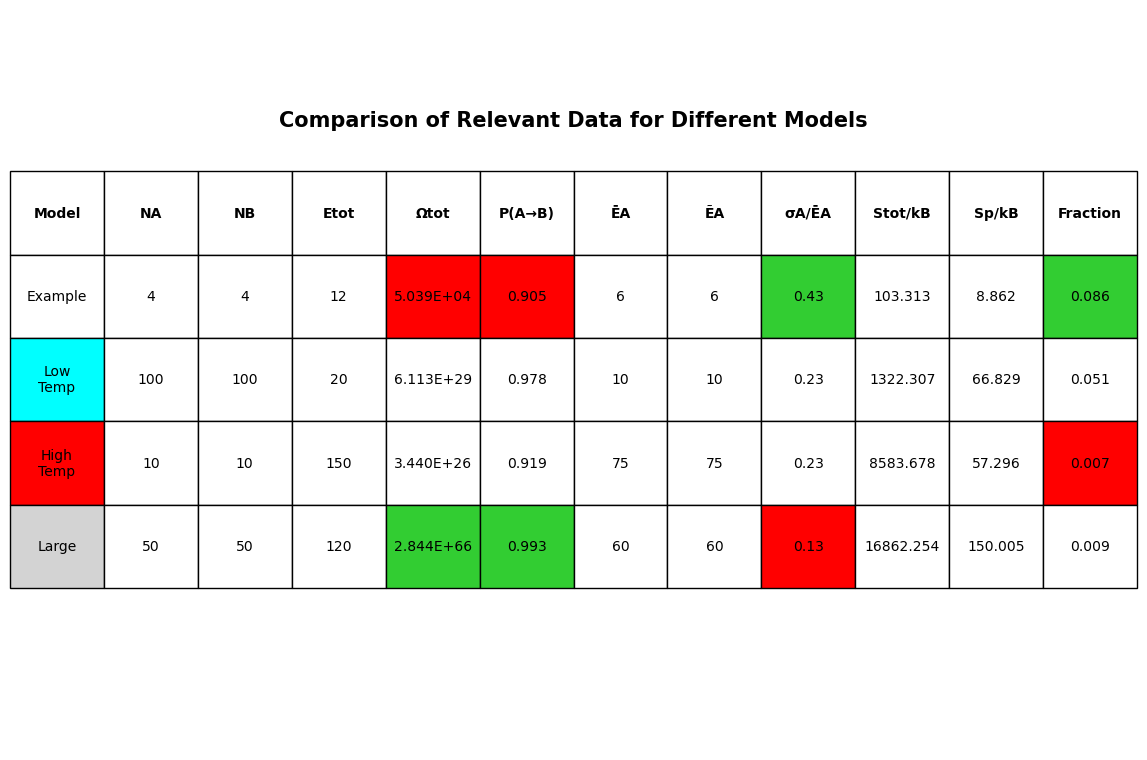

In [16]:
'''Name column labels'''
labels = ['Model', 'NA', 'NB', 'Etot', '\u03A9tot', 'P(A\u2192B)', '\u0112A',
          '\u1EBCA', '\u03C3A/\u0112A', 'Stot/kB', 'Sp/kB', 'Fraction']

'''Populate table for relevant data'''
table = [['Example', NA_ex, NB_ex, EA_ex + EB_ex, f'{tot_ex:.3E}', f'{probAtoB_ex:.3f}', meanEA_ex, probEA_ex,
          f'{fluctEA_ex:.2f}', f'{SkbF_ex:.3f}', f'{SkbP_ex:.3f}', f'{frac_ex:.3f}'],
         ['Low\nTemp', NA_lowT, NB_lowT, EA_lowT + EB_lowT, f'{tot_lowT:.3E}', f'{probAtoB_lowT:.3f}', meanEA_lowT, 
          probEA_lowT, f'{fluctEA_lowT:.2f}', f'{SkbF_lowT:.3f}', f'{SkbP_lowT:.3f}', f'{frac_lowT:.3f}'],
         ['High\nTemp', NA_highT, NB_highT, EA_highT + EB_highT, f'{tot_highT:.3E}', f'{probAtoB_highT:.3f}', meanEA_highT,
          probEA_highT, f'{fluctEA_highT:.2f}', f'{SkbF_highT:.3f}', f'{SkbP_highT:.3f}', f'{frac_highT:.3f}'],
         ['Large', NA_large, NB_large, EA_large + EB_large, f'{tot_large:.3E}', f'{probAtoB_large:.3f}', meanEA_large,
          probEA_large, f'{fluctEA_large:.2f}', f'{SkbF_large:.3f}', f'{SkbP_large:.3f}', f'{frac_large:.3f}']]

'''Set cell colors'''
colors = [['white', 'white', 'white', 'white', 'red', 'red', 'white', 'white', 'limegreen', 'white', 'white', 'limegreen'],
          ['aqua', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white'],
          ['red', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'red'],
          ['lightgray', 'white', 'white', 'white', 'limegreen', 'limegreen', 'white', 'white', 'red', 'white', 'white', 'white']]


'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
fig.tight_layout()
ax.axis('off')
the_table = ax.table(cellText = table, colLabels = labels, cellColours = colors, loc = 'center', cellLoc = 'center')

'''Adjust fonts and scale'''
for (row, col), cell in the_table.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontweight = 'bold')
the_table.scale(1, 5)

'''Create title'''
ax.annotate('Comparison of Relevant Data for Different Models', xy = (0.5, 0.85),
            xycoords = 'axes fraction', ha = 'center', va = 'center', fontsize = 15, fontweight = 'bold')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/EinsteinSolidsComparisonTable.png')

'''Discuss results'''
print('We considered four models: a small system, a low temperature system, a high temperature system, and a')
print('large system.  We see that the value of NA + Etot (or EB + Etot since we used EA = EB for each) is the')
print('most important factor in the relevant data.  For the small system, we have the least amount of microstates')
print('and probability of energy flowing from A to B, but we have the greatest relative fluctuation and fraction')
print('of the entropy of the most probable macrostate to the total entropy.  For the large sysetm, we have the')
print('greatest amount of microstates and probability of energy flowing from A to B, but we have the least relative')
print('fluctuation and a smaller fraction of the entropy of the most probable macrostate to the total entropy.')
print()
print('The results are what we expect.  For a large enough system, the results of statistical mechanics are')
print('equivalent to those of classical thermodynamics.  Therefore, we expect energy to always flow from hot')
print('to cold, expect equilibrium to be the most probable macrostate, and expect the relative fluctuation to')
print('be very narrow.  Overall, the systems test convey these expectations and this knowledge.')